<a href="https://colab.research.google.com/github/MacraeSmith/helloAI/blob/main/Assignment2_Darkness.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Darkness Assignment

In [4]:
import random
import math
import numpy as np
from tensorflow.keras.datasets import mnist
np.set_printoptions(linewidth=np.inf) #keep numpy from linewraping prints
(X_train, Y_train), (X_test, Y_test) = mnist.load_data() #returns tuple of tuples (tuple of pairs)
import matplotlib.pyplot as plt
%matplotlib inline


11490434/11490434 [==============================] - 0s 0us/step


X_train = training images &emsp; &emsp; X_test = test images <br>
Y_train = training image labels &emsp; &emsp; Y_test = test image labels <br>
(there are 60,000 training images and 10,000 test images) <br>
X_train[x] = darkness value of every pixel in the image "x" <br>
X_train[x,0,0] = darknes value of the upper left pixel of image "x" <br>
> .size = number of images or labels <br>
.shape = size of tuple (technically tuple inside a tuple)
>> X_train.shape = (60,000 images, 28 rows, 28 columns) <br>






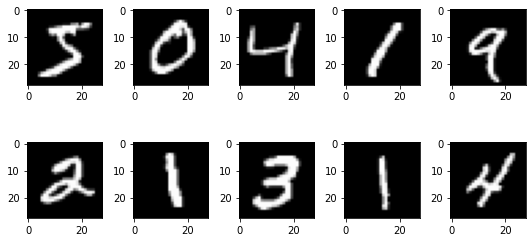

In [5]:
#use matplotlib to draw the first 10 TRAINING images in 2 rows 5 col
images = X_train[0:10]
labels = Y_train[0:10]
num_row = 2
num_col = 5
# plot images
fig, axes = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
for i in range(len(images)):
    ax = axes[i//num_col, i%num_col]
    ax.imshow(images[i], cmap='gray')
    #ax.set_title('Label: {}'.format(labels[i]))
plt.tight_layout()
plt.show()



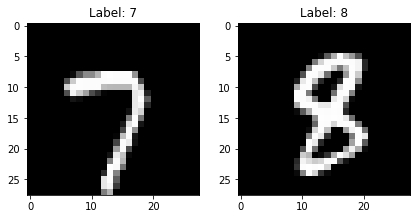

In [6]:
#use matplotlib to draw the 2 random TEST images side by side
randNum1 = random.randint(0, Y_test.size) 
randNum2 = random.randint(0, Y_test.size)

images = [X_test[randNum1], X_test[randNum2]] #uses same random number so that Image and label are the same
labels = [Y_test[randNum1], Y_test[randNum2]]
num_row = 1
num_col = 2
# plot images
fig, axes = plt.subplots(num_row, num_col, figsize=(3*num_col,3*num_row))
for i in range(len(images)):
    ax = axes[i%num_col]
    ax.imshow(images[i], cmap='gray')
    ax.set_title('Label: {}'.format(labels[i]))
plt.tight_layout()
plt.show()

In [7]:
#count how many of each digit are in training set
counts = [0]*10
for y in Y_train:
  counts[y] = counts[y]+ 1

print("number of each digit in training set")
for d in range(0, len(counts)):
  print(f'Digit {d}: {counts[d]}')
  


number of each digit in training set
Digit 0: 5923
Digit 1: 6742
Digit 2: 5958
Digit 3: 6131
Digit 4: 5842
Digit 5: 5421
Digit 6: 5918
Digit 7: 6265
Digit 8: 5851
Digit 9: 5949


#Darkness of Image

In [8]:
# create a function that calculates the darkness of a single image
# only works on 28x28 images
def calcDarkness(x):
  total = 0
  for r in range(28):
    for c in range(28):
      total = total + x[r][c]
  return total

In [9]:
# test darkness of our function
randNum = random.randint(0,Y_train.size) #chooses random image from training set
print("Image label:",Y_train[randNum]) #tells label on the image
print("Image darknes:",calcDarkness(X_train[randNum])) #calculates darkness on the image



Image label: 0
Image darknes: 40600


In [10]:
#use matplotlib to plot the average darkness of each digit
def avgDarknesses():
  darknesses = [0]*10
  # loop through all training images
  #pairs image data from x with label data from y
  for x, y in zip(X_train, Y_train):
    darkness = calcDarkness(x)
    darknesses[y] = darknesses[y] + darkness

  darknesses = [darknesstotal/counts[i] for i, darknesstotal in enumerate(darknesses)]
  return darknesses



In [11]:
#run avgDarknesses() function
avgDarkness = avgDarknesses()
print("Average darkness of training images")
for d in range(0, len(avgDarkness)):
  print(f'Digit {d}: {avgDarkness[d]}')

Average darkness of training images
Digit 0: 34665.99307783218
Digit 1: 15193.648620587363
Digit 2: 29783.10775427996
Digit 3: 28294.706246941772
Digit 4: 24263.40893529613
Digit 5: 25739.57885998893
Digit 6: 27449.37090233187
Digit 7: 22896.377334397446
Digit 8: 30019.183900188003
Digit 9: 24508.181375021013


In [12]:
#classify images based on closest darkness to predetermined darkness averages (see cell above for avgDarkness)
#Function takes an image, calls calcDarkness() and goes through every value for avgDarknesses
#it then assigns a "temporary digit label" to the image based on what avgDarknesses value is closest to its own
#it goes through all 10 digits and only overwrites its temporary label if average darkness of current digit is closer to its own darkness
def classifyImage(x):
  differenceThreshold = 100000.0 #starts with threshold that is larger than any average darkness of a digit
  digitLabels = [0,1,2,3,4,5,6,7,8,9]
  temporaryLabel = 0
  imageDarkness = calcDarkness(x)
  for i in range(0, (len(digitLabels))):
    darknessDifference = np.abs(avgDarkness[i] - imageDarkness)
    if (darknessDifference) <= differenceThreshold:
      differenceThreshold = darknessDifference
      temporaryLabel = digitLabels[i]
  return temporaryLabel


In [13]:
#Test classifyImage() function by choosing one random image from X_test 
#and displaying its given value and its value as assigned by classifyImage() function
randNum = random.randint(0,Y_test.size)
print("Correct label:",Y_test[randNum])
print("Calculated label:",classifyImage(X_test[randNum]))


Correct label: 9
Calculated label: 7


In [48]:
#Calculate accuracy of classifyImage() function against TEST images
totalRight = 0
digitsRight = [0]*10
digitsAccuracy = [0]*10
testDigitTotal = [0]*10
totalAccuracy = 0
for i in range( Y_test.size):
  testDigitTotal[Y_test[i]] += 1
  calcLabel = classifyImage(X_test[i])
  if calcLabel == Y_test[i]: #only adds to total correct and digitsRight if the calculated label is the same as the assigned label
    totalRight += 1 
    digitsRight[Y_test[i]] += 1
totalAccuracy = (totalRight/Y_test.size)

#calculates accuracy of each digit
for d in range(len(digitsAccuracy)):
  digitsAccuracy[d] = (digitsRight[d]/testDigitTotal[d])

#prints total accuracy and accuracy of each digit
print(f'{totalAccuracy * 100}% total accuracy')
digitPercentage = [0]*10
for n in range(len(digitsAccuracy)):
  digitPercentage[n] = digitsAccuracy[n] * 100
  print(f'Digit {n}: {digitsAccuracy[n] * 100}% accuracy')


22.3% total accuracy
Digit 0: 55.10204081632652% accuracy
Digit 1: 82.6431718061674% accuracy
Digit 2: 4.941860465116279% accuracy
Digit 3: 4.851485148514851% accuracy
Digit 4: 4.887983706720977% accuracy
Digit 5: 8.071748878923767% accuracy
Digit 6: 6.05427974947808% accuracy
Digit 7: 28.98832684824903% accuracy
Digit 8: 13.449691991786446% accuracy
Digit 9: 4.4598612487611495% accuracy


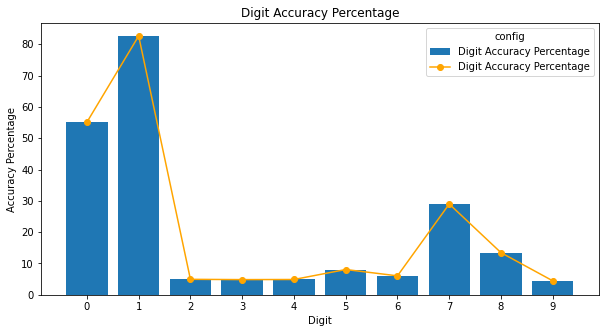

In [59]:
#Plot accuracy for each digit
fig, ax = plt.subplots(figsize=(10, 5))
labels = [f"{i}" for i in range(10)]
p1 = ax.bar(labels,digitPercentage, label="Digit Accuracy Percentage")
p2, = ax.plot(labels,digitPercentage, color='orange', label="Digit Accuracy Percentage", marker='o')
ax.legend(handles=[p1, p2],loc='upper right',title='config') 
ax.set_xlabel("Digit")
ax.set_ylabel("Accuracy Percentage")
plt.title("Digit Accuracy Percentage")
plt.show()

#Quadrant Slicing Not Finished
>not finished

In [ ]:
#function takes an image and creates a list with 4 values for each quadrant
#it then goes through each quadrant and stores its darkness in its corresponding index
def calcDarknessByQuad(x):
  totalDarkness = [0]*4
  for s in range(4):
    if (s == 0):
      for r in range(15):
        for c in range(15):
          totalDarkness[s] += x[r][c]
    elif s == 1:
      for r in range(15,28):
        for c in range(15):
          totalDarkness[s] += x[r][c]
    elif s == 2:
      for r in range(15):
        for c in range(15,28):
          totalDarkness[s] += x[r][c]
    else:
      for r in range(15,28):
        for c in range(15,28):
          totalDarkness[s] += x[r][c]
  return totalDarkness

In [ ]:
def classifyImageByQuad(x):
  differenceThreshold = 100000.0
  digitLabels = [0,1,2,3,4,5,6,7,8,9]
  temporaryLabelList = [0]*4
  quadrantDarkness = calcDarknessByQuad(x)

  for q in range(len(quadrantDarkness)):
    for i in range(0, (len(digitLabels))):
      darknessDifference = np.abs(avgDarknesses[i] - quadrantDarkness[q])
      if (darknessDifference) <= differenceThreshold:
        differenceThreshold = darknessDifference
        temporaryLabel = digitLabels[i]
  return temporaryLabel


In [ ]:
num = random.randint(0,Y_test.size)
print(calcDarknessByQuad(X_test[num]))
print(X_test[num])

[3760, 5729, 6529, 5127]
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  59 235  17   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 117 254 187   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 142 254 187   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   6   0   0   0   0   0   0   4 205 254 154   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   2 169  85   0   0  

#Toone's extra code

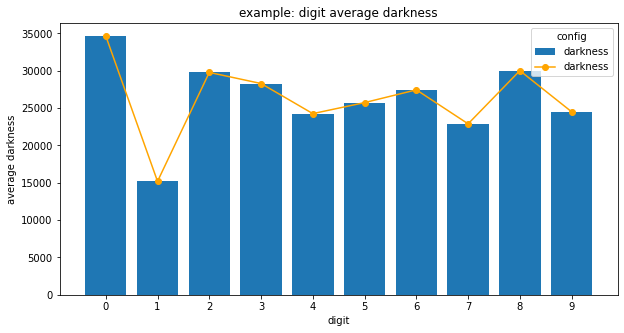

In [ ]:

# this is NOT part of the assignment, but it gives you some example code for working with matplotlib
# display all the accuracies and timings in a graph
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10, 5))
labels = [f"{i}" for i in range(10)]
p1 = ax.bar(labels,avgDarknesses, label="darkness")
p2, = ax.plot(labels,avgDarknesses, color='orange', label="darkness", marker='o')
ax.legend(handles=[p1, p2],loc='upper right',title='config') 
ax.set_xlabel("digit")
ax.set_ylabel("average darkness")
plt.title("example: digit average darkness")
plt.show()